# TASK 1 - EXPLORATORY DATA ANALYSIS

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## viewing

In [2]:
data=pd.read_csv('data.csv')
data.head()

,year,institute_type,round_no,quota,pool,institute_short,program_name,program_duration,degree_short,category,opening_rank,closing_rank,is_preparatory,Unnamed: 13
0,2016,IIT,6,AI,Gender-Neutral,IIT-Bombay,Aerospace Engineering,4 Years,B.Tech,GEN,838,1841,0,NaN
1,2016,IIT,6,AI,Gender-Neutral,IIT-Bombay,Aerospace Engineering,4 Years,B.Tech,OBC-NCL,408,1098,0,NaN
2,2016,IIT,6,AI,Gender-Neutral,IIT-Bombay,Aerospace Engineering,4 Years,B.Tech,SC,297,468,0,NaN
3,2016,IIT,6,AI,Gender-Neutral,IIT-Bombay,Aerospace Engineering,4 Years,B.Tech,ST,79,145,0,NaN
4,2016,IIT,6,AI,Gender-Neutral,IIT-Bombay,Aerospace Engineering,4 Years,B.Tech,GEN-PWD,94,94,0,NaN


## Q.1. Find the difference in opening and closing rank of any 5 IITS in year 2021

In [3]:
# Read the dataset into a pandas DataFrame
df = pd.read_csv('data.csv')

# Filter the DataFrame for the year 2021
df_2021 = df[df['year'] == 2021]

# Filter the DataFrame for IITs
iit_df = df_2021[df_2021['institute_type'] == 'IIT']

# Sort the DataFrame by opening rank in ascending order
iit_sorted = iit_df.sort_values('opening_rank')

# Select the top 5 IITs
data = iit_sorted.head(5)

# Calculate the difference between opening and closing rank
data['rank_difference'] = data['closing_rank'] - data['opening_rank'] 
data.head(5)

,year,institute_type,round_no,quota,pool,institute_short,program_name,program_duration,degree_short,category,opening_rank,closing_rank,is_preparatory,Unnamed: 13,rank_difference
9724,2021,IIT,1,AI,Gender-Neutral,IIT-Bombay,Computer Science and Engineering,4 Years,B.Tech,SC-PWD,1,1,0,NaN,0
31453,2021,IIT,2,AI,Gender-Neutral,IIT-Madras,Mechanical Engineering,4 Years,B.Tech,SC-PWD,1,1,1,NaN,0
25887,2021,IIT,2,AI,Gender-Neutral,IIT-Bombay,Computer Science and Engineering,4 Years,B.Tech,ST,1,11,0,NaN,10
9561,2021,IIT,1,AI,Gender-Neutral,IIT-Bombay,Computer Science and Engineering,4 Years,B.Tech,GEN,1,66,0,NaN,65
25885,2021,IIT,2,AI,Gender-Neutral,IIT-Bombay,Computer Science and Engineering,4 Years,B.Tech,SC,1,28,0,NaN,27


The summary includes the institute name, opening rank, closing rank, and rank difference for the top 5 IITs in 2021.
We can observe that here rank depends on branch as well as cateogary.

## Q.2. Are there any duplicate entries in the dataset? Identify and remove duplicate rows, if any, to ensure data integrity.

In [4]:
# Read the dataset into a pandas DataFrame
df = pd.read_csv('data.csv')

# Identify duplicate rows
duplicate_rows = df[df.duplicated()]

# Print the duplicate rows
print("Duplicate Rows:")
print(duplicate_rows)

# Remove duplicate rows
df = df.drop_duplicates()

# Verify if duplicate rows were removed
duplicate_rows_after_removal = df[df.duplicated()]

Duplicate Rows:
       year institute_type  round_no quota            pool institute_short  \
9255   2021            IIT         1    AI  Gender-Neutral      IIT-Bombay   
9256   2021            IIT         1    AI     Female-Only      IIT-Bombay   
9257   2021            IIT         1    AI  Gender-Neutral      IIT-Bombay   
9258   2021            IIT         1    AI     Female-Only      IIT-Bombay   
9259   2021            IIT         1    AI  Gender-Neutral      IIT-Bombay   
...     ...            ...       ...   ...             ...             ...   
64953  2021            NIT         1    JK     Female-Only    NIT-Srinagar   
64954  2021            NIT         1    JK  Gender-Neutral    NIT-Srinagar   
64955  2021            NIT         1    JK     Female-Only    NIT-Srinagar   
64956  2021            NIT         1    LA  Gender-Neutral    NIT-Srinagar   
64957  2021            NIT         1    LA     Female-Only    NIT-Srinagar   

                                    program_nam

The code removes the duplicate rows using drop_duplicate()
after removing 39500 rows and 14 columns is left

## Q.4. Show the distribution of different categeory for NIT.

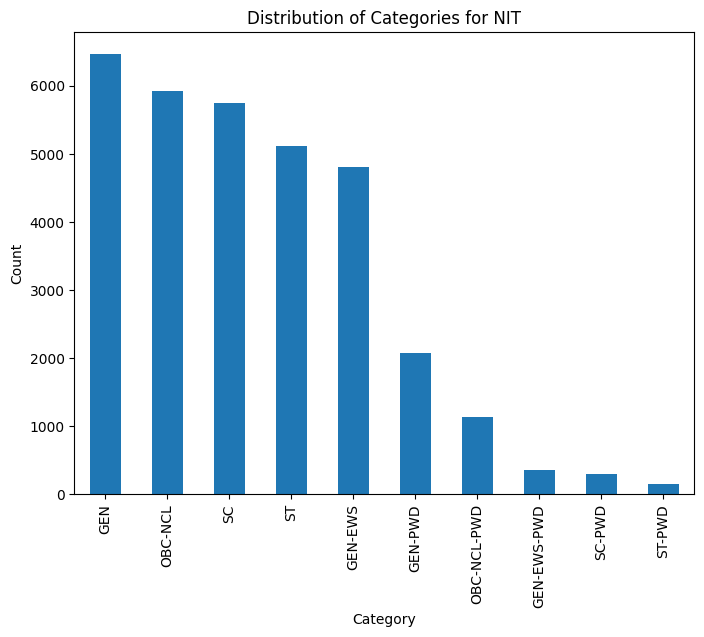

In [6]:
# Read the dataset into a pandas DataFrame
df = pd.read_csv('data.csv')

# Filter the DataFrame for NIT institutes
nit_df = df[df['institute_type'] == 'NIT']

# Count the occurrences of each category
category_counts = nit_df['category'].value_counts()

# Create a bar plot to visualize the distribution of categories
plt.figure(figsize=(8, 6))
category_counts.plot(kind='bar')
plt.title("Distribution of Categories for NIT")
plt.xlabel("Category")
plt.ylabel("Count")
plt.show()

We can see the difference between categories ST-PWD is lesser and GEN are the most.
All the seats are reserved category wise in NITs.

## Q.5. What is the distribution of the target variable "program_name".

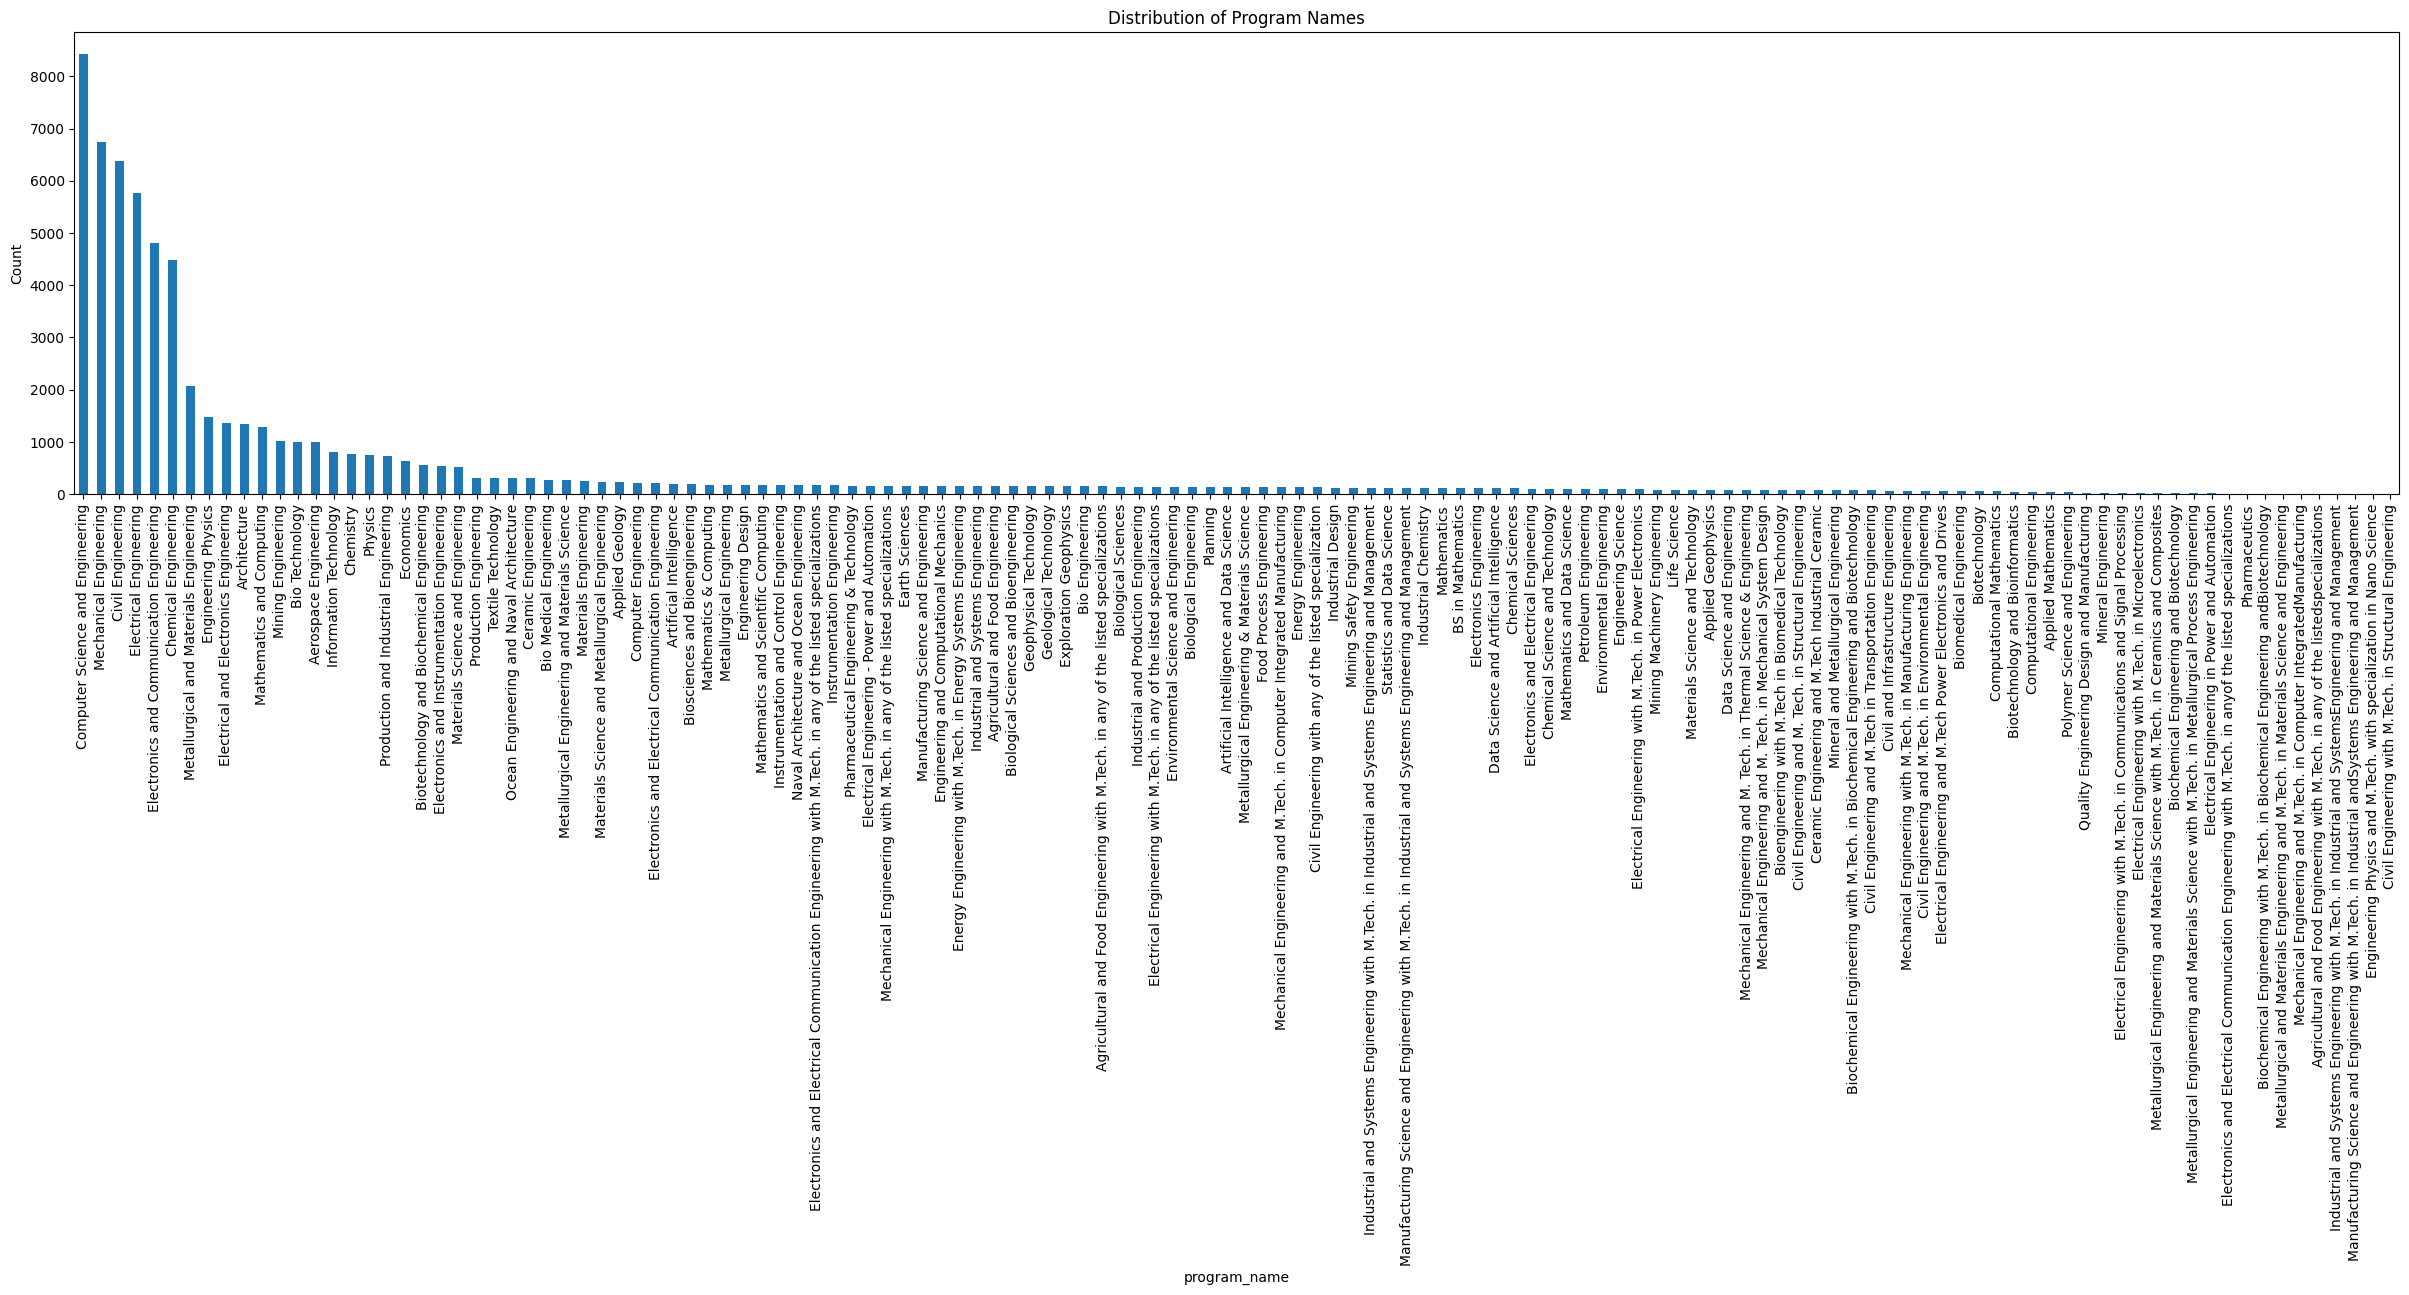

In [7]:
# Read the dataset into a pandas DataFrame
df = pd.read_csv('data.csv')

# Count the occurrences of each program_name
program_counts = df['program_name'].value_counts()

# Create a bar plot to visualize the distribution of program_name
plt.figure(figsize=(30, 6))
program_counts.plot(kind='bar')
plt.title("Distribution of Program Names")
plt.xlabel("program_name")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.show()

Here we can see the craze of all the branches like computer science, electronics etc. in both mtech and btech field.

# TASK 2 - CLASSIFICATION/REGRESSION

# Importing Libraries

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import LabelEncoder

In [10]:
data = df
data.head()

,year,institute_type,round_no,quota,pool,institute_short,program_name,program_duration,degree_short,category,opening_rank,closing_rank,is_preparatory,Unnamed: 13
0,2016,IIT,6,AI,Gender-Neutral,IIT-Bombay,Aerospace Engineering,4 Years,B.Tech,GEN,838,1841,0,NaN
1,2016,IIT,6,AI,Gender-Neutral,IIT-Bombay,Aerospace Engineering,4 Years,B.Tech,OBC-NCL,408,1098,0,NaN
2,2016,IIT,6,AI,Gender-Neutral,IIT-Bombay,Aerospace Engineering,4 Years,B.Tech,SC,297,468,0,NaN
3,2016,IIT,6,AI,Gender-Neutral,IIT-Bombay,Aerospace Engineering,4 Years,B.Tech,ST,79,145,0,NaN
4,2016,IIT,6,AI,Gender-Neutral,IIT-Bombay,Aerospace Engineering,4 Years,B.Tech,GEN-PWD,94,94,0,NaN


In [11]:
# Changing Institute type

data['institute_type'] = [0 if x == 'IIT' else 1 for x in data['institute_type']]
data['institute_type'].unique()

array([0, 1], dtype=int64)

In [12]:
# Labeling the quota values

le = LabelEncoder()
data['quota'] = le.fit_transform(data['quota'])
data['quota'].unique()

array([0, 3, 6, 1, 2, 4, 5])

In [13]:
# changing the pool values

data['pool'] = [0 if x == 'Gender-Neutral' else 1 for x in data['pool']]
data['pool'].unique()

array([0, 1], dtype=int64)

In [14]:
# Labeling the categories

data['category']= le.fit_transform(data['category'])
data['category'].unique()

array([0, 4, 6, 8, 3, 5, 7, 9, 1, 2])

In [15]:
# Selecting the target data

y = data[['institute_short', 'program_name', 'degree_short']]

# Selecting the featured data

X = data[['institute_type', 'round_no', 'quota', 'pool',
       'category', 'opening_rank', 'closing_rank']]

# Split dataset in train-test

In [20]:
# Spilliting the data into training and testing dataset

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8)
a = np.array([X_train.shape, X_test.shape, y_train.shape, y_test.shape], dtype = 'object')
a

array([[51966, 7],
       [12992, 7],
       [51966, 3],
       [12992, 3]], dtype=object)

In [21]:
# Importing library for model generation

from sklearn.ensemble import RandomForestClassifier 
model = RandomForestClassifier()

In [22]:
model.fit(X_train, y_train)

RandomForestClassifier()

In [27]:
# Predicting the model again in numerical terms

y_pred = model.predict(X_test)
y_pred

array([['IIT-Kharagpur',
        'Industrial and Systems Engineering with M.Tech. in Industrial and Systems Engineering and Management',
        'B.Tech + M.Tech (IDD)'],
       ['NIT-Jalandhar', 'Computer Science and Engineering', 'B.Tech'],
       ['NIT-Raipur', 'Electrical Engineering', 'B.Tech'],
       ...,
       ['IIT-Roorkee', 'Electrical Engineering', 'B.Tech'],
       ['IIT-Madras', 'Engineering Design', 'B.Tech + M.Tech (IDD)'],
       ['IIT-Delhi', 'Mathematics and Computing', 'B.Tech']], dtype=object)

In [30]:
# Accuracy for Institute short

from sklearn.metrics import classification_report 
y_pred1 = y_pred[:,0]
y_test1 = y_test.loc[:,"institute_short"]
print(classification_report(y_pred1, y_test1))

                         precision    recall  f1-score   support

     IIT-(BHU) Varanasi       0.71      0.70      0.71       463
      IIT-(ISM) Dhanbad       0.62      0.61      0.62       302
             IIT-Bhilai       0.75      0.73      0.74        70
        IIT-Bhubaneswar       0.64      0.69      0.66       209
             IIT-Bombay       0.82      0.83      0.83       582
              IIT-Delhi       0.81      0.79      0.80       621
            IIT-Dharwad       0.72      0.65      0.68        74
        IIT-Gandhinagar       0.64      0.71      0.67       113
                IIT-Goa       0.63      0.72      0.67        60
           IIT-Guwahati       0.66      0.65      0.65       212
          IIT-Hyderabad       0.66      0.68      0.67       202
             IIT-Indore       0.68      0.64      0.66       107
              IIT-Jammu       0.66      0.77      0.71       102
            IIT-Jodhpur       0.76      0.77      0.77       133
             IIT-Kanpur 

In [31]:
from sklearn.metrics import accuracy_score
Accuracy1 = accuracy_score(y_pred1, y_test1)
Accuracy1

0.7558497536945813

In [32]:
# Accuracy for Program Name

from sklearn.metrics import classification_report 
y_pred2 = y_pred[:,1]
y_test2 = y_test.loc[:,"program_name"]
print(classification_report(y_pred2, y_test2))


                                                                                                         precision    recall  f1-score   support

                                                                                  Aerospace Engineering       0.79      0.77      0.78       204
                                                                      Agricultural and Food Engineering       0.82      0.79      0.81        29
                    Agricultural and Food Engineering with M.Tech. in any of the listed specializations       0.81      0.78      0.79        27
                     Agricultural and Food Engineering with M.Tech. in any of the listedspecializations       0.00      0.00      0.00         1
                                                                                        Applied Geology       0.78      0.76      0.77        37
                                                                                     Applied Geophysics       0.53      0.53     

In [33]:
from sklearn.metrics import accuracy_score
Accuracy2 = accuracy_score(y_pred2, y_test2)
Accuracy2


0.760929802955665

In [34]:
# Accuracy for Degree 

from sklearn.metrics import classification_report 
y_pred3 = y_pred[:,2]
y_test3 = y_test.loc[:,"degree_short"]
print(classification_report(y_pred3, y_test3))

                       precision    recall  f1-score   support

               B.Arch       0.83      0.91      0.87       240
               B.Plan       0.73      0.95      0.83        20
               B.Tech       0.98      0.95      0.97     10675
B.Tech + M.Tech (IDD)       0.77      0.87      0.82      1087
        BS + MS (IDD)       1.00      1.00      1.00       133
                  BSc       0.87      0.96      0.91       406
      BSc + MSc (IDD)       0.78      1.00      0.87        38
 Btech + M.Tech (IDD)       0.83      0.94      0.88       153
           Int M.Tech       0.73      0.83      0.78       117
             Int MSc.       0.00      0.00      0.00        26
             Int Msc.       0.74      0.89      0.80        97

             accuracy                           0.94     12992
            macro avg       0.75      0.85      0.79     12992
         weighted avg       0.95      0.94      0.94     12992



In [35]:
from sklearn.metrics import accuracy_score
Accuracy3 = accuracy_score(y_pred3, y_test3)
Accuracy3


0.9423491379310345

In [38]:
# total accuracy of the model

Mean_Accuracy = (Accuracy1 + Accuracy2 + Accuracy3) / 3
Mean_Accuracy

0.819709564860427

Accuracy for institute short - 75.5%
Accuracy for program name - 76.09%
Accuracy for degree - 94.2%

## AFTER CALCULATING
Total Accuracy of the model - 81.9%